In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

/home/bruno/codenation/data-science-1/venv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
market = pd.read_csv('data/estaticos_market.csv', index_col='Unnamed: 0')
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
portfolio1 = pd.read_csv('data/estaticos_portfolio1.csv', index_col='Unnamed: 0')
portfolio2 = pd.read_csv('data/estaticos_portfolio2.csv', index_col='Unnamed: 0')
portfolio3 = pd.read_csv('data/estaticos_portfolio3.csv', index_col='Unnamed: 0')

In [4]:
print('Market shape: {}'.format(market.shape))
print('Portfolio 1 shape: {}'.format(portfolio1.shape))
print('Portfolio 2 shape: {}'.format(portfolio2.shape))
print('Portfolio 3 shape: {}'.format(portfolio3.shape))

Market shape: (462298, 181)
Portfolio 1 shape: (555, 181)
Portfolio 2 shape: (566, 1)
Portfolio 3 shape: (265, 1)


In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 614.1+ MB


In [6]:
market_infos = pd.DataFrame({'column': market.columns,
                             'dtype': market.dtypes,
                             'missing_percent': market.isna().sum()/market.shape[0],
                             'n_unique': market.nunique()}).reset_index().drop('index', axis=1)
market_infos.head()

,column,dtype,missing_percent,n_unique
0,id,object,0.0,462298
1,fl_matriz,bool,0.0,2
2,de_natureza_juridica,object,0.0,67
3,sg_uf,object,0.0,6
4,natureza_juridica_macro,object,0.0,7


In [7]:
booleans = ['fl_rm', 'fl_spa', 'fl_antt', 'fl_veiculo', 'fl_optante_simples', 'fl_optante_simei',
            'fl_simples_irregular', 'fl_passivel_iss']
market[booleans] = market[booleans].astype('bool')

In [8]:
market_infos.sort_values('missing_percent', ascending=False).head(20)

,column,dtype,missing_percent,n_unique
59,qt_alteracao_socio_total,float64,1.000000,0
60,qt_alteracao_socio_90d,float64,1.000000,0
161,grau_instrucao_macro_desconhecido,float64,1.000000,0
61,qt_alteracao_socio_180d,float64,1.000000,0
62,qt_alteracao_socio_365d,float64,1.000000,0
86,coligada_mais_antiga_baixada,float64,0.999706,46
85,coligada_mais_nova_baixada,float64,0.999706,46
87,idade_media_coligadas_baixadas,float64,0.999706,48
25,vl_total_veiculos_antt,float64,0.999619,20
24,vl_total_tancagem,float64,0.999394,33


Seems like the market dataframe has a lot of columns with a big quantity of missing values. Let's check this quantity for values bigger than 70%, 80%, 90% and 95% of missing data.

In [9]:
print('More than 70% of missing data: {}'.format(market_infos[market_infos['missing_percent'] > .7].shape[0]))
print('More than 80% of missing data: {}'.format(market_infos[market_infos['missing_percent'] > .8].shape[0]))
print('More than 90% of missing data: {}'.format(market_infos[market_infos['missing_percent'] > .9].shape[0]))
print('More than 95% of missing data: {}'.format(market_infos[market_infos['missing_percent'] > .95].shape[0]))

More than 70% of missing data: 129
More than 80% of missing data: 115
More than 90% of missing data: 58
More than 95% of missing data: 34


As market dataframe has 182 columns and 462298 rows, it's possible to maintain all columns that have less than 90% and remove columns with more than that.

In [10]:
column_remove = list(market_infos[market_infos['missing_percent'] > .9]['column'])
try:
    market.drop(column_remove, axis=1, inplace=True)
except KeyError:
    pass
market_infos = market_infos[~market_infos['column'].isin(column_remove)]
market_infos

,column,dtype,missing_percent,n_unique
0,id,object,0.000000,462298
1,fl_matriz,bool,0.000000,2
2,de_natureza_juridica,object,0.000000,67
3,sg_uf,object,0.000000,6
4,natureza_juridica_macro,object,0.000000,7
...,...,...,...,...
176,qt_funcionarios_24meses,float64,0.775958,762
177,tx_crescimento_12meses,float64,0.840172,2237
178,tx_crescimento_24meses,float64,0.839900,3388
179,tx_rotatividade,float64,0.775958,2548


In [11]:
market_infos[market_infos['n_unique'] == 1].shape

(7, 4)

Let's remove columns with only 1 unique value, as it gives no relevant information to the training set

In [13]:
column_remove2 = list(market_infos[market_infos['n_unique'] == 1]['column'])
try:
    market.drop(column_remove2, axis=1, inplace=True)
except KeyError:
    pass
market_infos = market_infos[~market_infos['column'].isin(column_remove2)]
market_infos.reset_index(drop=True, inplace=True)
market_infos

,column,dtype,missing_percent,n_unique
0,id,object,0.000000,462298
1,fl_matriz,bool,0.000000,2
2,de_natureza_juridica,object,0.000000,67
3,sg_uf,object,0.000000,6
4,natureza_juridica_macro,object,0.000000,7
...,...,...,...,...
111,qt_funcionarios_24meses,float64,0.775958,762
112,tx_crescimento_12meses,float64,0.840172,2237
113,tx_crescimento_24meses,float64,0.839900,3388
114,tx_rotatividade,float64,0.775958,2548


In [21]:
column_others = ['dt_situacao']
try:
    market.drop(column_others, axis=1, inplace=True)
except:
    pass
market_infos = market_infos[~market_infos['column'].isin(column_others)]

## EDA

In [15]:
market.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.000000,460371.000000,460371.000000,417022.000000,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,...,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
mean,9.948677,3.591801,48.699177,25.007247,1308.005725,1.496326,1.476681,0.019645,42.816452,44.344131,...,58.060498,96.661983,36.258851,12.324570,12.178529,14.343329,3.097607,-5.834288,9.510699,28.737044
std,9.615664,72.600352,1206.696804,9.679799,1161.889222,3.276626,3.258079,0.195166,12.626447,13.930385,...,142.951278,279.541243,123.411370,222.456579,222.584458,239.885359,163.581549,443.825819,27.918737,468.626094
min,0.016438,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,...,1.933333,1.933333,1.933333,0.000000,0.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000
25%,2.756164,0.000000,0.000000,22.000000,673.230000,1.000000,1.000000,0.000000,33.000000,34.000000,...,25.203704,33.333333,6.966667,0.000000,0.000000,0.000000,0.000000,-44.444444,0.000000,0.000000
50%,6.704110,0.000000,0.000000,23.000000,946.680000,1.000000,1.000000,0.000000,42.000000,43.000000,...,43.533333,61.766667,23.200000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,14.465753,0.000000,0.000000,25.000000,1518.080000,2.000000,2.000000,0.000000,51.000000,54.000000,...,68.883333,96.266667,46.500000,5.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,106.432877,9782.000000,122090.000000,66.000000,75093.840000,246.000000,246.000000,13.000000,127.000000,127.000000,...,5099.066667,5099.066667,5099.066667,51547.000000,51547.000000,54205.000000,27800.000000,87300.000000,1400.000000,9647.000000


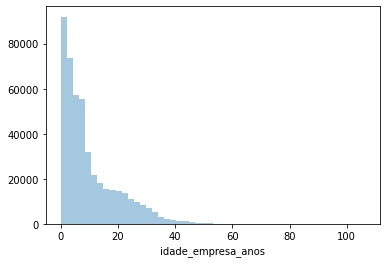

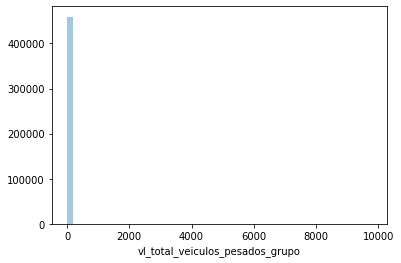

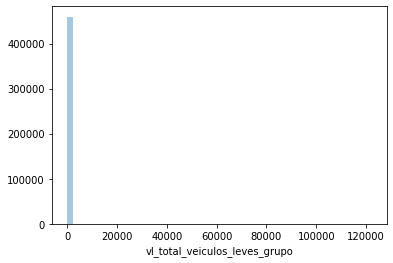

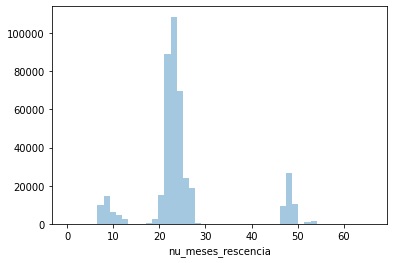

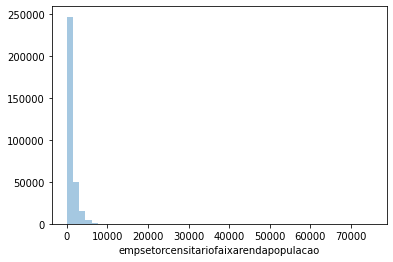

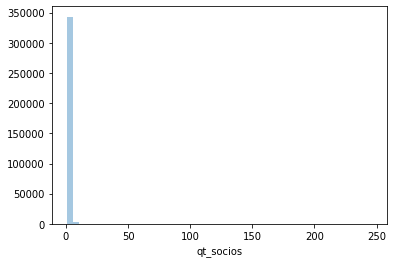

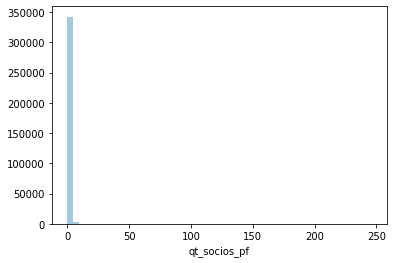

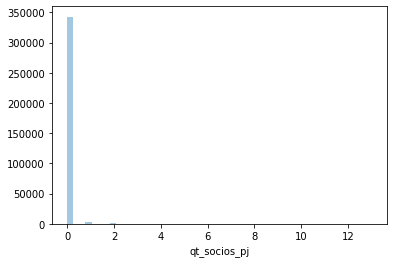

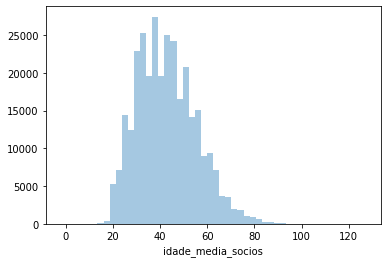

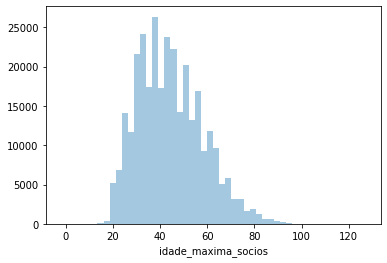

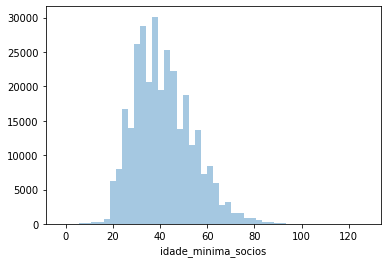

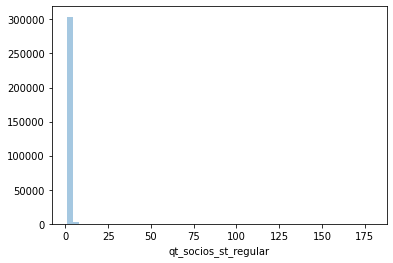

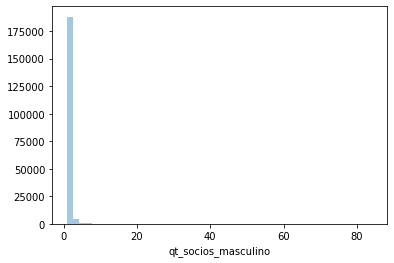

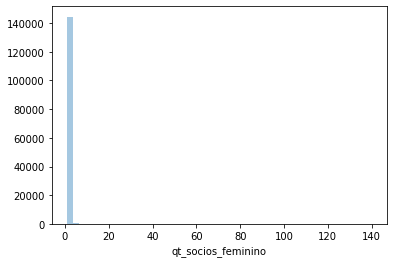

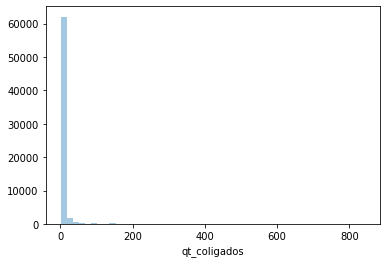

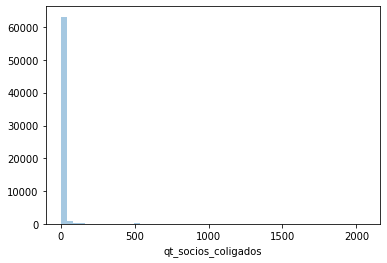

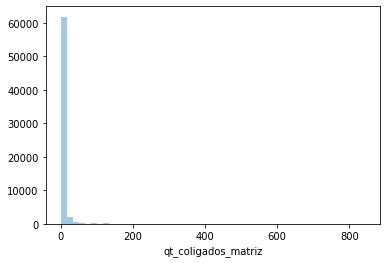

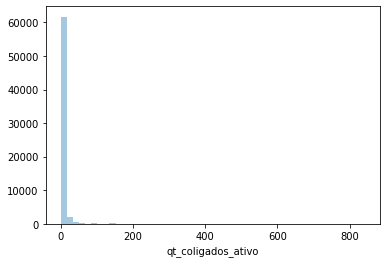

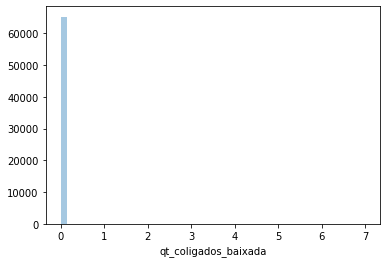

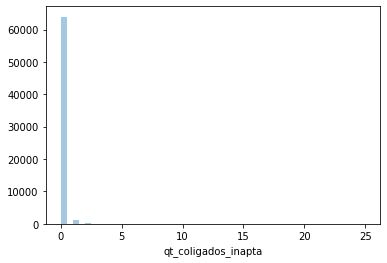

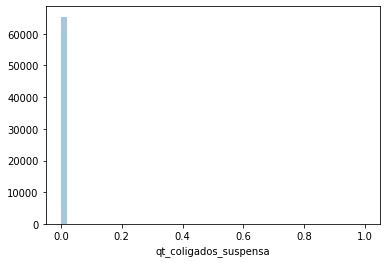

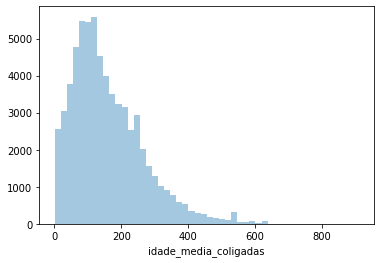

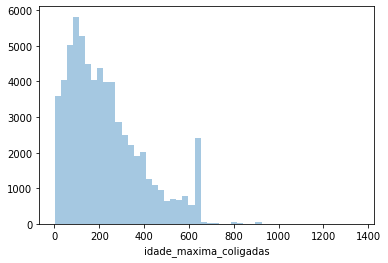

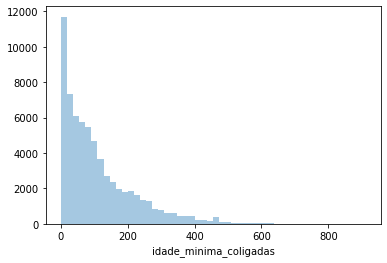

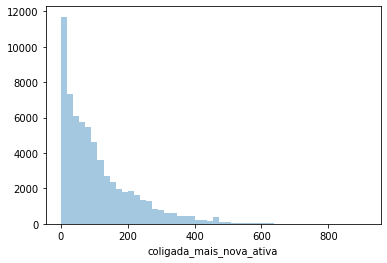

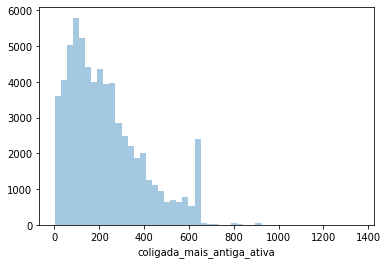

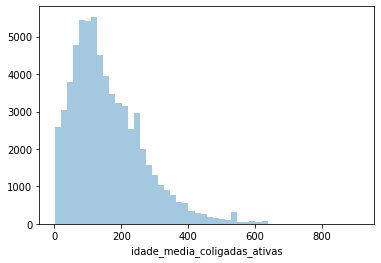

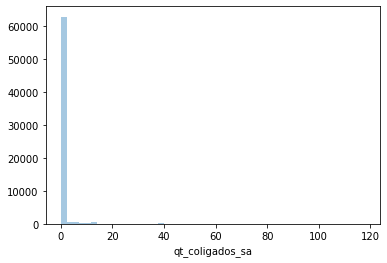

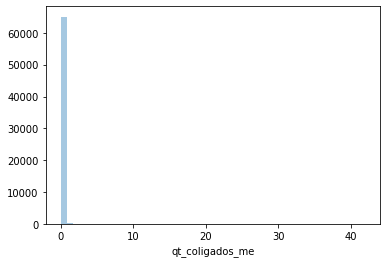

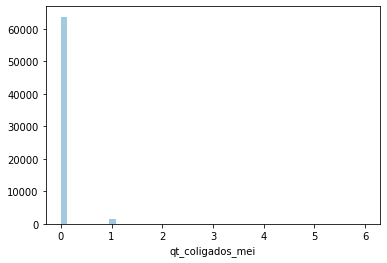

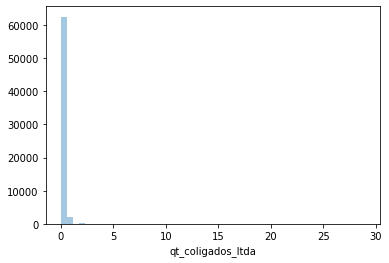

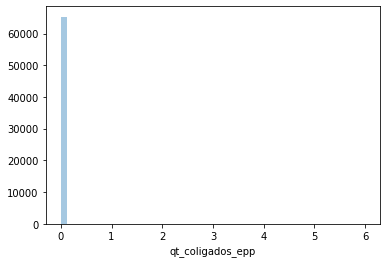

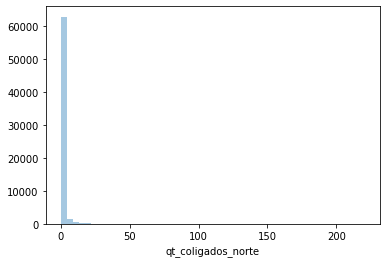

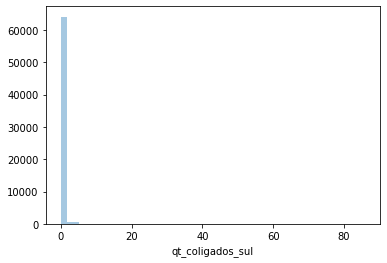

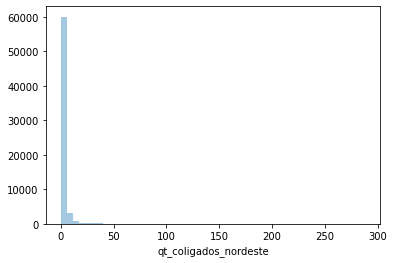

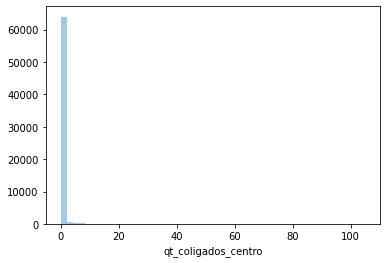

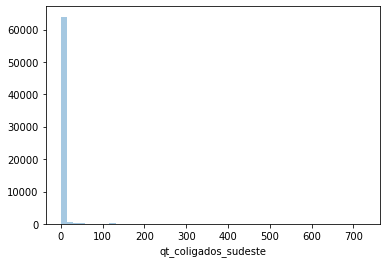

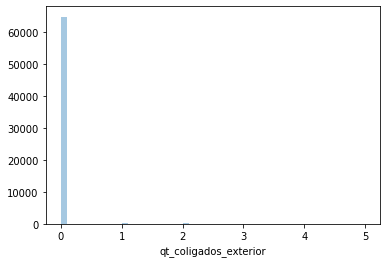

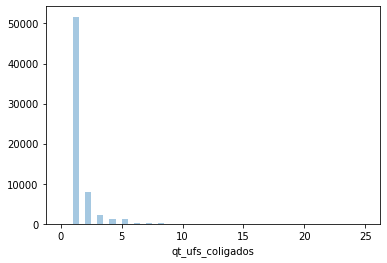

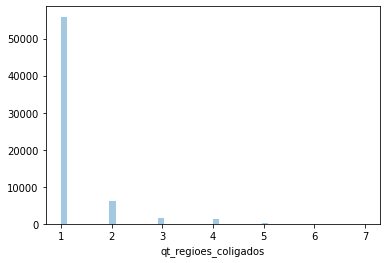

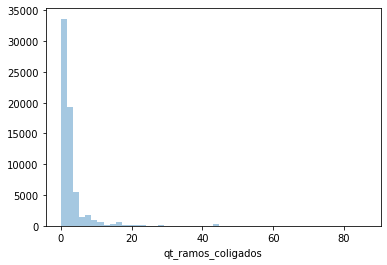

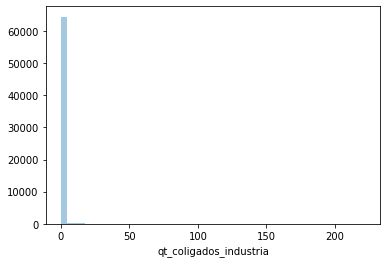

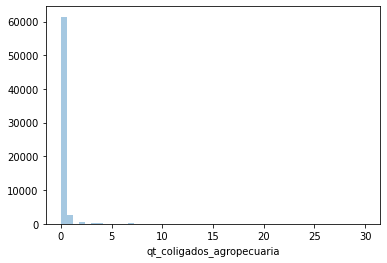

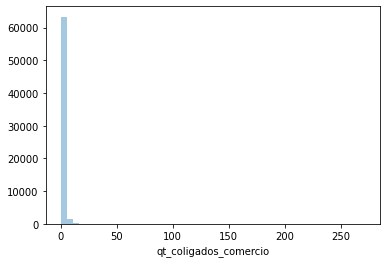

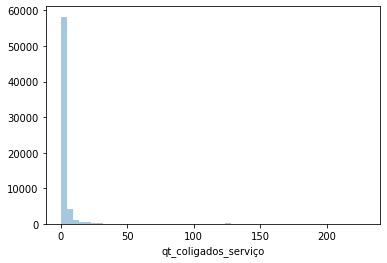

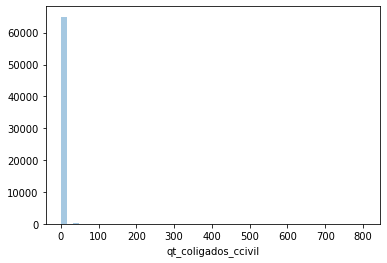

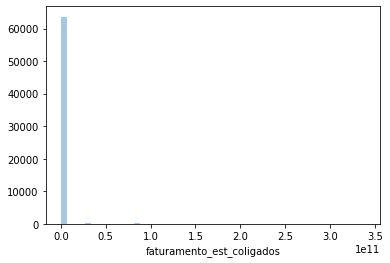

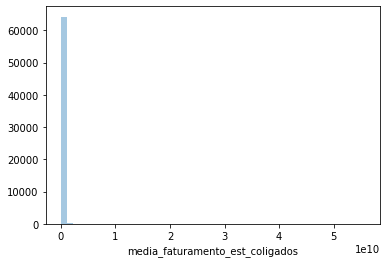

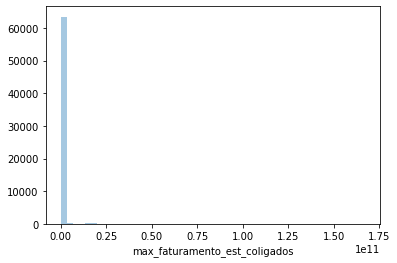

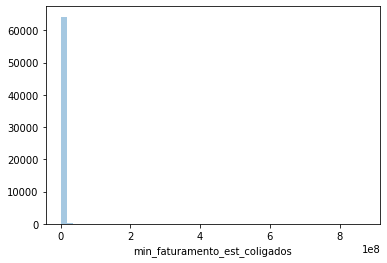

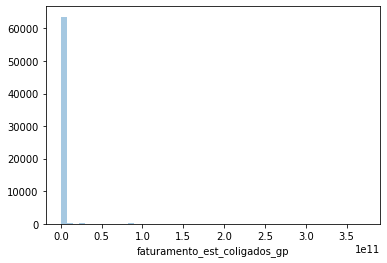

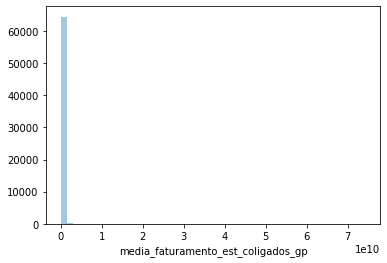

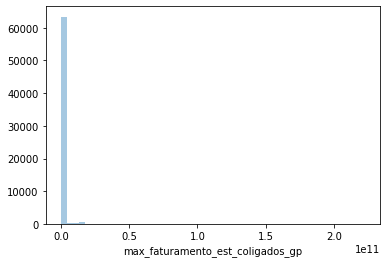

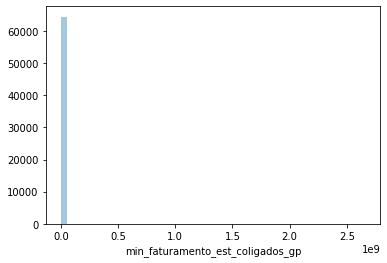

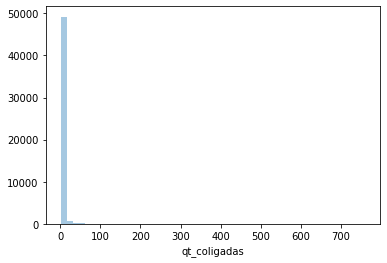

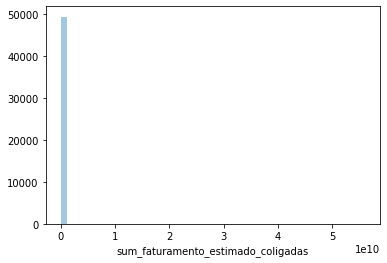

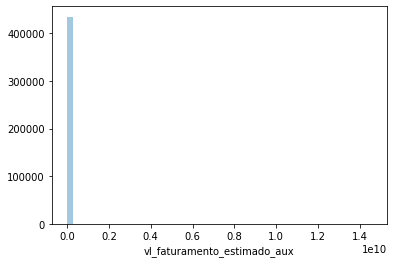

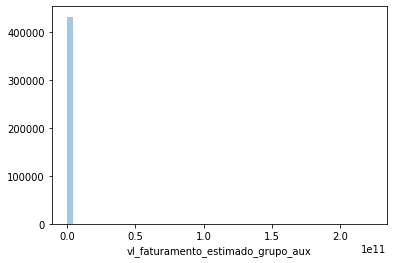

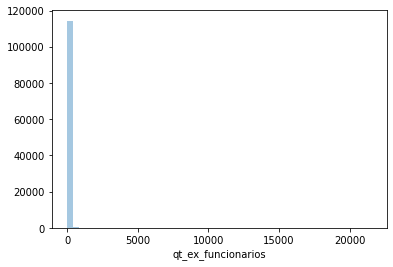

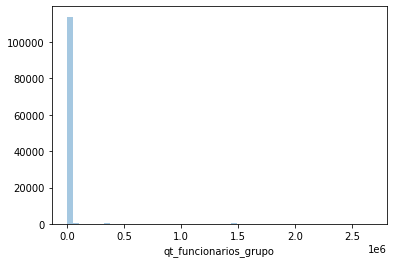

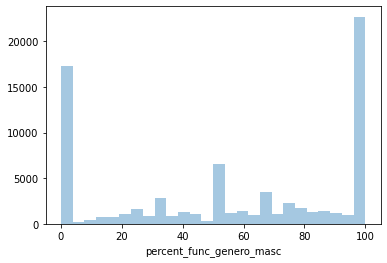

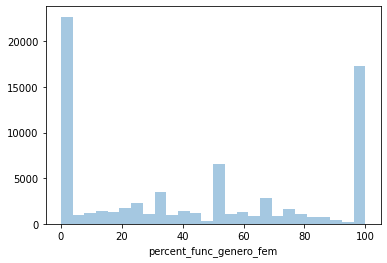

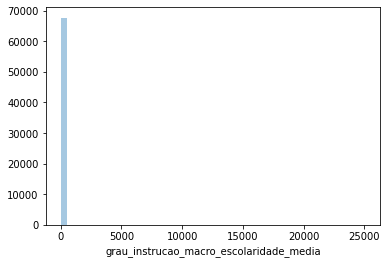

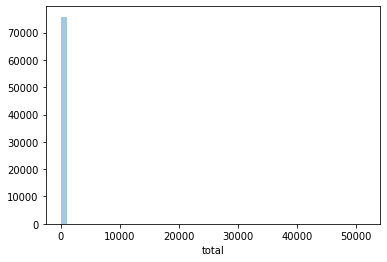

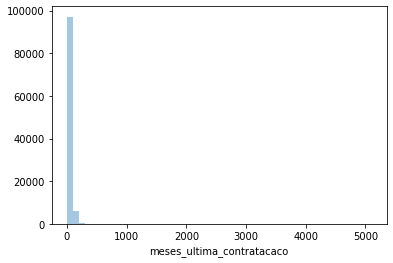

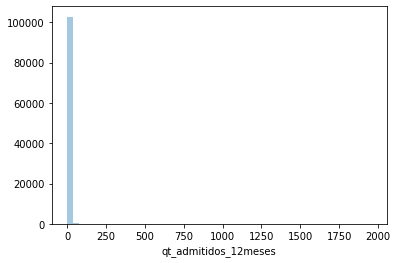

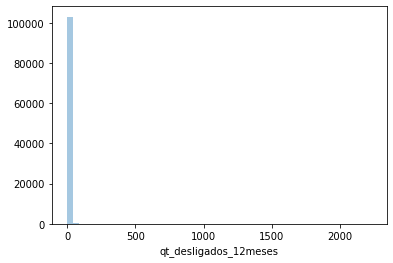

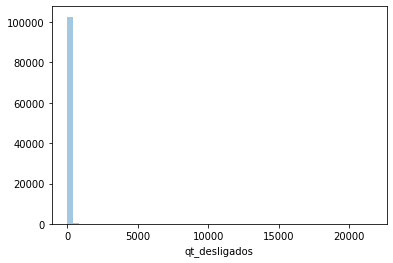

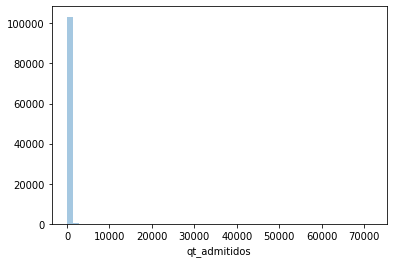

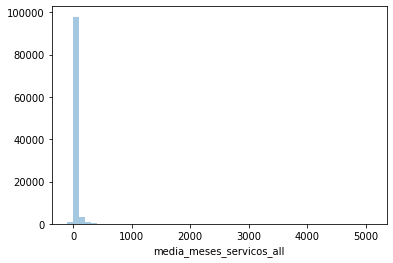

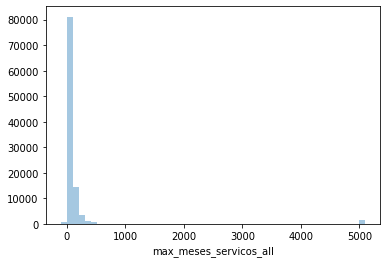

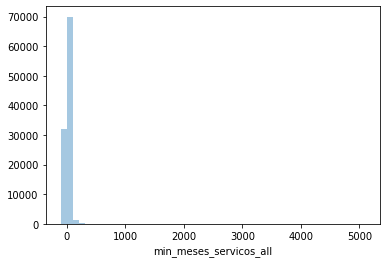

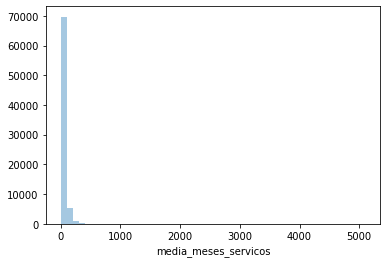

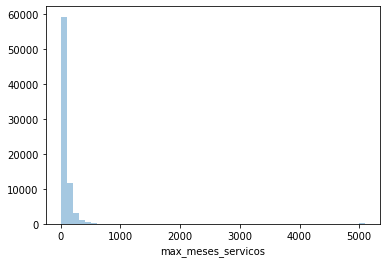

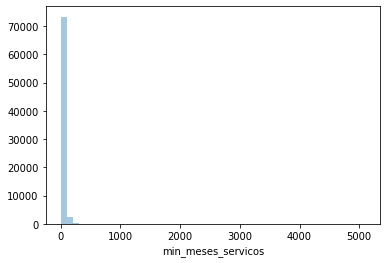

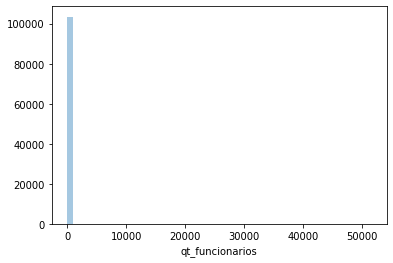

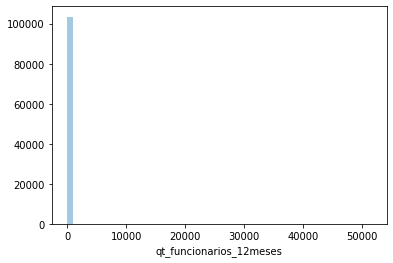

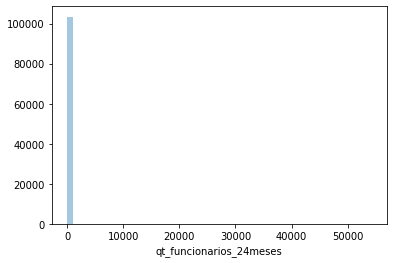

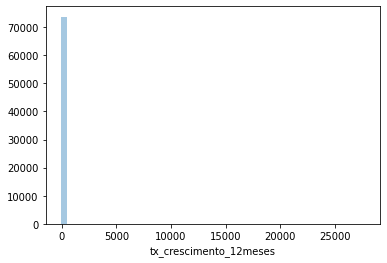

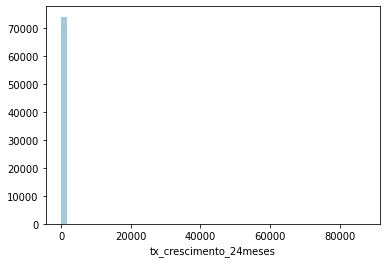

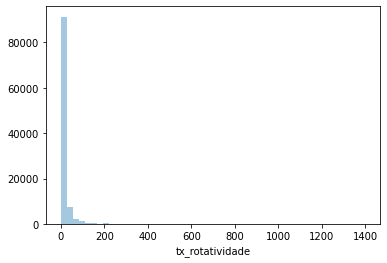

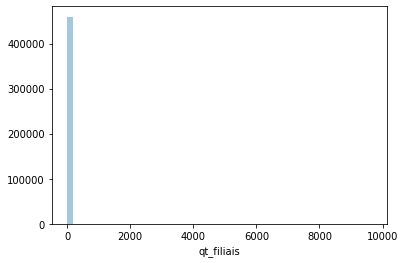

In [16]:
columns_num = market.select_dtypes(include=['int64', 'float64'])
for column in columns_num:    
    sns.distplot(market[column][~np.isnan(market[column])], kde=False)
    plt.show()

## Filling missing values

In [25]:
def fill_missing(df: pd.DataFrame, train=True) -> pd.DataFrame:
    """
    
    Parameters
    ----------
    df: pd.DataFrame
        Dataframe that will have it's missing values filled
    train: bool, optional
        True if df is the training dataset and False otherwise
        
    Returns
    -------
    pd.DataFrame
        Dataframe with missing values filled
    """
    
    fill_median = ['idade_empresa_anos', 'nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
                   'percent_func_genero_masc', 'percent_func_genero_fem',
                   'grau_instrucao_macro_escolaridade_media', 'total', 'qt_funcionarios',
                   'qt_funcionarios_12meses', 'qt_funcionarios_24meses', 'tx_crescimento_12meses',
                   'tx_crescimento_24meses', 'tx_rotatividade']
    
    fill_0 = ['vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'qt_socios',
              'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
              'idade_minima_socios', 'qt_socios_st_regular', 'qt_socios_masculino',
              'qt_socios_feminino', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz',
              'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa',
              'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas',
              'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas',
              'qt_coligados_sa', 'qt_coligados_me', 'qt_coligados_mei', 'qt_coligados_ltda',
              'qt_coligados_epp', 'qt_coligados_norte', 'qt_coligados_sul', 'qt_coligados_nordeste',
              'qt_coligados_centro', 'qt_coligados_sudeste', 'qt_coligados_exterior', 'qt_ufs_coligados',
              'qt_regioes_coligados', 'qt_ramos_coligados', 'qt_coligados_industria', 'qt_coligados_agropecuaria',
              'qt_coligados_comercio', 'qt_coligados_serviço', 'qt_coligados_ccivil', 'faturamento_est_coligados',
              'media_faturamento_est_coligados', 'max_faturamento_est_coligados', 'min_faturamento_est_coligados',
              'faturamento_est_coligados_gp', 'media_faturamento_est_coligados_gp',
              'max_faturamento_est_coligados_gp', 'min_faturamento_est_coligados_gp', 'qt_coligadas',
              'sum_faturamento_estimado_coligadas', 'vl_faturamento_estimado_aux',
              'vl_faturamento_estimado_grupo_aux', 'qt_ex_funcionarios', 'qt_funcionarios_grupo',
              'meses_ultima_contratacaco', 'qt_admitidos_12meses', 'qt_desligados_12meses',
              'qt_desligados', 'qt_admitidos', 'media_meses_servicos_all', 'max_meses_servicos_all',
              'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
              'min_meses_servicos', 'qt_filiais']
    
    fill_mode = list(market_infos[market_infos['dtype'] == 'object']['column'])
    fill_mode.remove('id')
    
    if train:
        df[fill_0] = df[fill_0].fillna(0)
        
        imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
        imp_median.fit_transform(df[fill_median])
        
        imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp_mode.fit_transform(df[fill_mode])
        
    else:
        df[fill_0] = df[fill_0].fillna(0)
        imp_median.transform(df[fill_median])
        imp_mode.transform(df[fill_mode])
    
    return df

In [ ]:
train_data = fill_missing(df=market, train=True)